**Описание проекта**

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 
Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?


После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.


Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.


***Ход исследования:***

- Шаг 1. Изучение общей информации о датасете
- Шаг 2. Подготовка данных
- Шаг 3. Изучение и проверка данных
- Шаг 4. Изучение воронки событий
- Шаг 5. Изучение результатов эксперимента
- Шаг 6. Написание общего вывода

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие. 

- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

### Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats as st
import datetime as dt
import math as mth


In [2]:
try:
    df = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv', sep='\t')

In [3]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
def data_information(dataset):
    print('Первые строки таблицы:')
    print('*'*50)
    display(dataset.head())
    print('Информация о таблице:')
    print('*'*50)
    dataset.info()
    print('Количество явных дубликатов:')
    print('*'*50)
    display(dataset.duplicated().sum())

In [5]:
data_information(df)

Первые строки таблицы:
**************************************************


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Информация о таблице:
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
Количество явных дубликатов:
**************************************************


413

***Заменим названия столбцов***

In [6]:
df=df.rename(columns={'EventName' : 'event_name', 'DeviceIDHash' : 'device_id_hash',\
                          'EventTimestamp' : 'event_timestamp', 'ExpId' : 'exp_id'})

In [7]:
df

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


***Удалим дубликаты***

In [8]:
df = df.drop_duplicates()

***Добавим столбец даты и времени, а также отдельный столбец дат***

In [9]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'],  unit='s')

df['date'] = df['event_timestamp'].dt.date

C:\Users\AD82~1\AppData\Local\Temp/ipykernel_8896/4004302329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_timestamp'] = pd.to_datetime(df['event_timestamp'],  unit='s')
C:\Users\AD82~1\AppData\Local\Temp/ipykernel_8896/4004302329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['event_timestamp'].dt.date


In [10]:
df

,event_name,device_id_hash,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


### Изучение и проверка данных

#### Проверим есть в таблице пользователи, которые могли одновременно оказаться в другой группе

In [11]:
users_abc=np.intersect1d(df[df['exp_id'] == '246']['device_id_hash'].unique(),\
                         df[df['exp_id'] == '247']['device_id_hash'].unique(),\
                         df[df['exp_id'] == '248']['device_id_hash'].unique())
users_abc

array([], dtype=int64)

Пользователи в группах не пересекаются

#### Посчитаем количество событий в логе

In [12]:
print('Всего в логе', df['event_name'].count(), 'событий')

Всего в логе 243713 событий


In [13]:
#посмотрим на виды событий
df['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

#### Посчитаем количество пользователей в логе

In [14]:
print('Всего в логе', df['device_id_hash'].nunique(), 'пользователь')

Всего в логе 7551 пользователь


#### Среднее количество событий на пользователя

In [15]:
df.groupby('device_id_hash').agg({'event_name' : 'count'}).describe()

,event_name
count,7551.000000
mean,32.275593
std,65.154219
min,1.000000
25%,9.000000
50%,20.000000
75%,37.000000
max,2307.000000


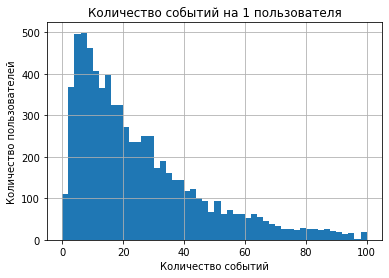

In [16]:
df.groupby('device_id_hash').agg({'event_name' : 'count'}).hist(range=(0,100), bins=50)

plt.title('Количество событий на 1 пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей');

В среднем на пользователя приходится около 32 событий.

#### Найдитем максимальную и минимальную дату. Изучим, как меняется количество данных. Определим с какого момента данные полные.

In [17]:
print('Минимальная дата', df['date'].min())
print('Максимальная дата', df['date'].max())

Минимальная дата 2019-07-25
Максимальная дата 2019-08-07


In [18]:
df['date'].value_counts()

2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
2019-07-31     2030
2019-07-30      412
2019-07-29      184
2019-07-28      105
2019-07-27       55
2019-07-26       31
2019-07-25        9
Name: date, dtype: int64

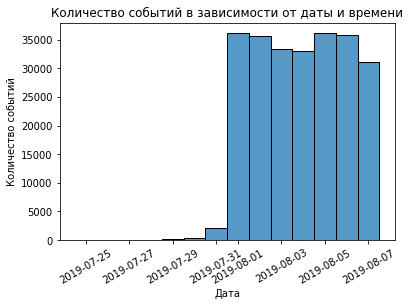

In [19]:
sns.histplot(x='date', data=df)

plt.ylabel('Количество событий')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.title('Количество событий в зависимости от даты и времени');

In [20]:
# удалим данные с 25 июля 2019 г. по 31 июля 2019 г. из-за их неполноты
date_threshold = pd.to_datetime('2019-08-01', format = '%Y-%m-%d')
logs = df.query('date >= @date_threshold')

In [21]:
logs

,event_name,device_id_hash,event_timestamp,exp_id,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


Таблица содержит данные за период с 25 июля 2019 г. по 7 августа 2019 г. На графике можно увидеть, что с 1 августа данные наиболее полные и ежедневное количество событий не менее 31 тыс. 

Таким образом, мы приняли решение отбросить данные с 25 июля 2019 г. по 31 июля 2019 г. включительно. 

In [22]:
#посмотрим насколько уменьшилось количество записей в новой таблице
df.shape[0] - logs.shape[0]

2826

In [23]:
#доля, на которую уменьшилось количество записей в новой таблице
round((df.shape[0] - logs.shape[0]) / df.shape[0] * 100, 3)

1.16

In [24]:
#посмотрим насколько уменьшилось количество пользователей в новой таблице
df['device_id_hash'].nunique() - logs['device_id_hash'].nunique()

17

In [25]:
#доля, на которую уменьшилось количество пользователей в новой таблице
round((df['device_id_hash'].nunique() - logs['device_id_hash'].nunique()) / df['device_id_hash'].nunique() * 100, 3)

0.225

Отбросив неполные данные, мы потеряли 2 826 событий или 1.16% датасета. Это же количество событий приходится на 17 уникальных пользователей мобильного приложения, доля которых составляет 0.23%.

#### Проверим наличие пользователей во всех трёх экспериментальных группах.

In [26]:
logs['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

In [27]:
exp_count = logs.groupby('exp_id').agg({'device_id_hash': 'nunique'})
exp_count

,device_id_hash
exp_id,
246,2484
247,2513
248,2537


Таким образом на 3 группы приходится примерно 77-84 тыс. событий и по 2,5 тыс. уникальных пользователей.

### Изучение воронки событий

#### Посмотрим какие события есть в логах, как часто они встречаются.

In [28]:
event_count=logs['event_name'].value_counts().sort_values(ascending=False).to_frame()
event_count

,event_name
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


Итак, в логах содержится 5 событий. 

На первом месте по количеству посещений вход на главную страницу (MainScreenAppear) - 117 328 событий.
На втором месте просмотр экрана с предложениями (OffersScreenAppear) - 46 333.
На третьем месте наполнение корзины товаром (CartScreenAppear) - 42 303, затем идет успешная оплата товаров (PaymentScreenSuccessful) - 33 918 событий. Меньше всего пользователи смотрят руководство (Tutorial) - 1 005.

#### Посчитаем сколько пользователей совершали каждое из этих событий.

In [29]:
users_count = logs.groupby('event_name').agg({'device_id_hash': 'nunique'}).sort_values(by = 'device_id_hash', ascending=False)
users_count['share'] = round(users_count / logs['device_id_hash'].nunique() *100, 2)
users_count

,device_id_hash,share
event_name,,
MainScreenAppear,7419,98.47
OffersScreenAppear,4593,60.96
CartScreenAppear,3734,49.56
PaymentScreenSuccessful,3539,46.97
Tutorial,840,11.15


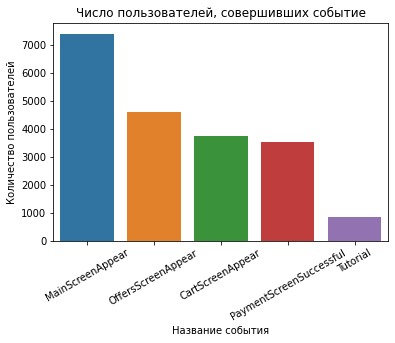

In [30]:
sns.barplot(x=users_count.index, y=users_count['device_id_hash'], data=users_count) 

plt.ylabel('Количество пользователей')
plt.xlabel('Название события')
plt.title('Число пользователей, совершивших событие')
plt.xticks(rotation=30);

Предполагаем, что воронка продаж складывается следующим образом:
- пользователь заходит на главную страницу сайта;
- пользователь переходит на понравившийся товар;
- пользоватеь добавляет товар в корзину;
- пользователь успешно оплачивает заказ.


Обучение (Tutorial) является необязательным событием и оно итересно лишь 11 % пользователей, в то время как большинство пользователей игнорируют эту страницу, в связи с чем можно не учитывать данное событие при дальнейшем исследовании.

#### Доля пользователей, которая проходит на следующий шаг воронки (от числа пользователей на предыдущем)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Tutorial не является частью воронки!
</div>

In [31]:
share_of_users = logs.query('event_name != "Tutorial"').groupby('event_name').agg({'device_id_hash': 'nunique'}) \
                    .sort_values(by='device_id_hash', ascending=False).reset_index()
share_of_users['share'] = 100 + share_of_users['device_id_hash'].pct_change() * 100
share_of_users

,event_name,device_id_hash,share
0,MainScreenAppear,7419,NaN
1,OffersScreenAppear,4593,61.908613
2,CartScreenAppear,3734,81.297627
3,PaymentScreenSuccessful,3539,94.777718


На страницу с предложением проходит 62 % пользователей, посмотревших главную страницу. После этого, на страницу корзины переходит 81% пользователей. На страницу оплаты переходит 95% пользователей.

#### На каком шаге теряется больше всего пользователей?

Самая большая потеря пользователей происходит при переходе с главной страницы на экран с предложением - переход осуществляют только 62% пользователей. Возможно, главный экран сайта содержит неудобную навигацию или непонятен для пользователей, или имеют место быть другие причины.

#### Какая доля пользователей доходит от первого события до оплаты?

In [32]:
share_of_users['share_of_all'] = share_of_users['device_id_hash'] / share_of_users['device_id_hash'].iloc[0] * 100
share_of_users

,event_name,device_id_hash,share,share_of_all
0,MainScreenAppear,7419,NaN,100.000000
1,OffersScreenAppear,4593,61.908613,61.908613
2,CartScreenAppear,3734,81.297627,50.330233
3,PaymentScreenSuccessful,3539,94.777718,47.701847


Таким образом, от первого события до оплаты проходит 47.7% пользователей.

In [ ]:
import plotly.express as px
data = dict(labels=share_of_users['event_name'],
            values=share_of_users['share_of_all'])
fig = px.funnel(data, y='labels', x='values')
fig.show()

### Изучение результатов эксперимента

#### Количество пользователей в каждой экспериментальной группе

In [ ]:
exp_count

Есть 2 контрольные группы для А/А-эксперимента. Чтобы проверить корректность всех механизмов и расчётов, прверим, находят ли статистические критерии разницу между выборками 246 и 247.

In [ ]:
#посмотрим на сводную таблицу по группам 246 и 247
test_group = logs[logs['exp_id'] != 248].pivot_table(index=logs['event_name'], columns=logs['exp_id'], aggfunc={'count', 'nunique'})['device_id_hash']
test_group.columns = ['events_246', 'events_247', 'users_246', 'users_247']
test_group['events_total'] = test_group['events_246'] + test_group['events_247']
test_group['users_total'] = test_group['users_246'] + test_group['users_247']
test_group.sort_values(by='events_246', ascending=False)


Проверка гипотезы о равенстве долей будет осуществляться при помощи Z-критерия.

In [ ]:
def z_test(group_a, group_b, event, alpha):
    group_users = np.array([logs.query('event_name == @event and exp_id == @group_a').device_id_hash.nunique(),
                           logs.query('event_name == @event and exp_id == @group_b').device_id_hash.nunique()])
    total_users = np.array([logs.query('exp_id == @group_a').device_id_hash.nunique(),
                           logs.query('exp_id == @group_b').device_id_hash.nunique()])
    
    # пропорция в первой группе:
    p1 = group_users[0]/total_users[0]

    # пропорция во второй группе:
    p2 = group_users[1]/total_users[1]

    # пропорция в комбинированном датасете:
    p_combined = (group_users[0] + group_users[1]) / (total_users[0] + total_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / total_users[0] + 1 / total_users[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)    
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p_value: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [ ]:
# критический уровень статистической значимости
alpha = 0.05  

Сформулируем гипотезы:

1. Н0: Доли между группами одинаковы;
2. Н1: Доли между группами различаются.

***Сравнение группы 246 с группой 247 (без измененного шрифта)***

In [ ]:
group_a = 246
group_b = 247

In [ ]:
print('Посещение пользователем главного экрана')
event = 'MainScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Посещение пользователем страницы с предложениями')
event = 'OffersScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Добавление пользователем товара в корзину')
event = 'CartScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Успешная оплата товара пользователем')
event = 'PaymentScreenSuccessful'
z_test(group_a, group_b, event, alpha)


Таким образом, тест показал, что нет оснований считать контрольные выборки групп 246 и 247 разными. Равные доли говорят о том, что контрольные группы выбраны корректно.

Самым популярным событием является посещение главной страницы. В контрольных группах это число составило 2 450 и 2 476 пользователей.

#### Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. 

***Сравнение группы 246 (без измененного шрифта) с группой 248 (с измененным шрифтом)***

In [ ]:
group_a = 246
group_b = 248

Сформулируем гипотезы:

1. Н0: Доли между группами одинаковы;
2. Н1: Доли между группами различаются.

In [ ]:
print('Посещение пользователем главного экрана')
event = 'MainScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Посещение пользователем страницы с предложениями')
event = 'OffersScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Добавление пользователем товара в корзину')
event = 'CartScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Успешная оплата товара пользователем')
event = 'PaymentScreenSuccessful'
z_test(group_a, group_b, event, alpha)

***Сравнение группы 247 (без измененного шрифта) с группой 248 (с измененным шрифтом)***

In [ ]:
group_a = 247
group_b = 248

In [ ]:
print('Посещение пользователем главного экрана')
event = 'MainScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Посещение пользователем страницы с предложениями')
event = 'OffersScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Добавление пользователем товара в корзину')
event = 'CartScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Успешная оплата товара пользователем')
event = 'PaymentScreenSuccessful'
z_test(group_a, group_b, event, alpha)

#### Сравним результаты с объединённой контрольной группой.

In [ ]:
group_a = [246, 247]
group_b = 248

In [ ]:
print('Посещение пользователем главного экрана')
event = 'MainScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Посещение пользователем страницы с предложениями')
event = 'OffersScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Добавление пользователем товара в корзину')
event = 'CartScreenAppear'
z_test(group_a, group_b, event, alpha)
print('')

print('Успешная оплата товара пользователем')
event = 'PaymentScreenSuccessful'
z_test(group_a, group_b, event, alpha)

В общей сложности мы провели 16 проверок статистических гипотез.

Изначально при проверке статистических гипотез был использован уровень статистической знчимости 0.05.
В результате чего мы установили, что между контрольными группами (246 и 247) и группой с измененными шрифтами (248) значимых различий нет. Нулевая гипотеза не отвергается и доли во всех выборках равны.

Таким образом гипотеза о том, что изменение шрифта на главной странице как-то повлияет на метрики конверсии не подтвердилась.

При использовании уровня значимости 0.1 было обнаружено различие между группами 246 и 248 в доле пользователей, перешедших к корзине. 

### Вывод

- Общее количество событий в логах - 244 126;


- Всего в логе 5 событий: На первом месте по количеству посещений вход на главную страницу (MainScreenAppear) - 117 328 событий. На втором месте просмотр экрана с предложениями (OffersScreenAppear) - 46 333. На третьем месте наполнение корзины товаром (CartScreenAppear) - 42 303, затем идет успешная оплата товаров (PaymentScreenSuccessful) - 33 918 событий. Меньше всего пользователи смотрят руководство (Tutorial) - 1 005;


- В логе всего 7 551 пользователь. В среднем на пользователя приходится около 30 событий;


- В таблице представленны данные с 25.07.2019  по 07.08.2019 гг. Данные с 25.07.2019 по 31.07.2019 г. нами были отброшены ввиду их неполноты. Исследуемый период фактически стал с 01.08.2019 - 07.08.2019;


- Самое популярное событие - MainScreenAppear. Событие, которое реже всего используется пользователями - Tutorial;


- Воронка продаж выглядит следующим образом: MainScreenAppear (главный экран) > OffersScreenAppear (страница с предложением) > CartScreenAppear (корзина) > PaymentScreenSuccessful (страница успешной оплаты);


- Подсчет процента пользователей, котрые проходят на следующий этап воронки, показал, что на страницу с предложением проходит 62 % пользователей, посмотревших главную страницу. После этого, на страницу корзины переходит 81% пользователей. На страницу оплаты переходит 95% пользователей;


- Самым популярным событием является посещение главной страницы. В контрольных группах это число составило 2 450 и 2 476 пользователей;


- От самого первого события до оплаты проходит 47.7% пользователей;


- Самая большая потеря пользователей происходит при переходе с главной страницы на экран с предложением - переход осуществляют только 62% пользователей. Возможно, главный экран сайта содержит неудобную навигацию или непонятен для пользователей;


- При использовании уровня значимости 0.05, значимой разницы между тестовой группой и контрольными группами при всех событиях нет. При использовании уровня значимости 0.1 было обнаружено различие между группами 246 и 248 в доле пользователей, перешедших к корзине.